In [1]:
import segyio
import segysak
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Ruta local al archivo (en DBFS)
sgy_path = "data/f3_dataset.sgy"

In [3]:
with segyio.open(sgy_path, "r", ignore_geometry=True) as f:
    bin_header = f.bin
    
    # Leer valores DIRECTAMENTE de la cabecera binaria (pueden contener errores)
    muestras_por_traza_bin = bin_header[segyio.BinField.Samples]
    intervalo_muestreo = bin_header[segyio.BinField.Interval]
    formato_datos = bin_header[segyio.BinField.Format]
    
    # Obtener valores REALES del archivo
    num_trazas_real = f.tracecount
    num_muestras_real = f.samples.size
    duracion_real = num_muestras_real * intervalo_muestreo / 1000000
    
    print("\n2. CABECERA BINARIA (VALORES CRUDOS):")
    print(f"• Muestras por traza (crudo): {muestras_por_traza_bin}")
    print(f"• Intervalo de muestra: {intervalo_muestreo} μs")
    print(f"• Duración calculada: {muestras_por_traza_bin * intervalo_muestreo / 1000000} s")
    print(f"• Formato de datos: {formato_datos}")
    
    print("\n3. GEOMETRÍA REAL (CORREGIDA):")
    print(f"• Total de trazas: {num_trazas_real}")
    print(f"• Muestras por traza (real): {num_muestras_real}")
    print(f"• Duración real: {duracion_real} s")
    
    # Ejemplo de datos
    primera_traza = f.trace[0][90:100]
    print(f"\nValores de muestra en traza 0 [90:100]: {primera_traza}")


2. CABECERA BINARIA (VALORES CRUDOS):
• Muestras por traza (crudo): 462
• Intervalo de muestra: 4000 μs
• Duración calculada: 1.848 s
• Formato de datos: 3

3. GEOMETRÍA REAL (CORREGIDA):
• Total de trazas: 600515
• Muestras por traza (real): 462
• Duración real: 1.848 s

Valores de muestra en traza 0 [90:100]: [-1040  2545    73 -1760   710   616 -1218   815  1967  -513]


In [4]:
# Importamos las bibliotecas necesarias
from segysak.segy import segy_header_scan, get_segy_texthead
import pandas as pd

# Obtenemos la cabecera textual del archivo SEG-Y sgy_path 

text_header = get_segy_texthead(sgy_path)
print("\nCabecera Textual del archivo SEG-Y:")
print(text_header)

# Realizamos el escaneo de los encabezados del archivo SEG-Y
print(f"\nEscaneo de los encabezados del archivo SEG-Y en ruta:{sgy_path}")
scan = segy_header_scan(sgy_path)

# Guardamos el resultado en un DataFrame
df_headers = pd.DataFrame(scan)
df_headers.reset_index(inplace=True)
# Configuramos las opciones de visualización de pandas
pd.set_option('display.max_rows', 200)  # Mostrar 200 filas
pd.set_option('display.max_columns', 200)  # Mostrar 91 columnas
pd.set_option('display.width', None)

# Mostramos el resultado del escaneo completo
print("\nResultado completo del escaneo de encabezados:")
print(f"Número de headers: {len(df_headers.index)}")
display(df_headers)


Cabecera Textual del archivo SEG-Y:
ääÊÁ/ÈÁÀÂ`èÍÁ øÊ
äãàÁ_?
ä
ä
äâ`ÈÁø?ËÑÈÑ?>ËÑ>/ÀÀÑÈÑ?>È?êáîËÈ/>À/ÊÀø?ËÑÈÑ?>Ë
äìÄ??ÊÀÑ>/ÈÁ
äßÄ??ÊÀÑ>/ÈÁ
äñ>%Ñ>ÁÂ`ÈÁÑ>È
äì%Ñ>ÁÂ`ÈÁÑ>È
ä
ä
ä

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]



Resultado completo del escaneo de encabezados:
Número de headers: 91


,index,byte_loc,count,mean,std,min,25%,50%,75%,max
0,TRACE_SEQUENCE_LINE,1,1000.0,4.539010e+02,285.031623,1.0,201.75,451.5,701.25,951.0
1,TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
2,FieldRecord,9,1000.0,1.000490e+02,0.215976,100.0,100.00,100.0,100.00,101.0
3,TraceNumber,13,1000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
4,EnergySourcePoint,17,1000.0,7.529010e+02,285.031623,300.0,500.75,750.5,1000.25,1250.0
5,CDP,21,1000.0,7.529010e+02,285.031623,300.0,500.75,750.5,1000.25,1250.0
6,CDP_TRACE,25,1000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
7,TraceIdentificationCode,29,1000.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
8,NSummedTraces,31,1000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
9,NStackedTraces,33,1000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0


In [5]:
def detectar_secciones(archivo_sgy):
    """
    Función para detectar secciones sísmicas en un archivo SEG-Y.
    Soluciona el problema de encoding UTF-8 para caracteres especiales.
    """
    # Diccionario para almacenar valores de encabezados
    headers = {
        'FieldRecord': [],
        'ShotPoint': [],
        'INLINE_3D': [],
        'CROSSLINE_3D': [],
        'EnergySourcePoint': [],
        'CDP': [],
        'YearDataRecorded': []
    }
    
    secciones = []
    cambios = [0]  # Incluir inicio
    
    with segyio.open(archivo_sgy, "r", ignore_geometry=True) as f:
        # Leer encabezados clave
        for header in f.header:
            headers['FieldRecord'].append(header[segyio.TraceField.FieldRecord])
            headers['ShotPoint'].append(header[segyio.TraceField.ShotPoint])
            headers['INLINE_3D'].append(header.get(segyio.TraceField.INLINE_3D, -99999))
            headers['CROSSLINE_3D'].append(header.get(segyio.TraceField.CROSSLINE_3D, -99999))
            headers['EnergySourcePoint'].append(header[segyio.TraceField.EnergySourcePoint])
            headers['CDP'].append(header[segyio.TraceField.CDP])
            headers['YearDataRecorded'].append(header.get(segyio.TraceField.YearDataRecorded, -99999))
        
        # Detectar cambios bruscos
        for i in range(1, len(headers['FieldRecord'])):
            cambio_detectado = False
            
            # 1. Cambio en FieldRecord (nuevo registro de campo)
            if headers['FieldRecord'][i] != headers['FieldRecord'][i-1]:
                cambio_detectado = True
            
            # 2. Salto en ShotPoint (reinicio de numeración)
            elif headers['ShotPoint'][i] < headers['ShotPoint'][i-1]:
                cambio_detectado = True
            
            # 3. Discontinuidad en coordenadas 3D
            elif abs(headers['INLINE_3D'][i] - headers['INLINE_3D'][i-1]) > 1:
                cambio_detectado = True
            elif abs(headers['CROSSLINE_3D'][i] - headers['CROSSLINE_3D'][i-1]) > 1:
                cambio_detectado = True
            
            # 4. Cambio en año de adquisición (para datos 4D)
            elif headers['YearDataRecorded'][i] != headers['YearDataRecorded'][i-1]:
                cambio_detectado = True
            
            if cambio_detectado:
                cambios.append(i)
        
        # Agrupar secciones
        cambios.append(len(headers['FieldRecord']))
        for i in range(1, len(cambios)):
            secciones.append({
                'start': cambios[i-1],
                'end': cambios[i]-1,
                'traces': cambios[i] - cambios[i-1],
                'FieldRecord': (headers['FieldRecord'][cambios[i-1]], headers['FieldRecord'][cambios[i]-1]),
                'ShotPoint': (headers['ShotPoint'][cambios[i-1]], headers['ShotPoint'][cambios[i]-1]),
                'INLINE_3D': (headers['INLINE_3D'][cambios[i-1]], headers['INLINE_3D'][cambios[i]-1]),
                'CROSSLINE_3D': (headers['CROSSLINE_3D'][cambios[i-1]], headers['CROSSLINE_3D'][cambios[i]-1])
            })
    
    return secciones, headers

def analizar_secciones_sismicas(archivo_sgy):
    """
    Función principal para analizar secciones sísmicas y generar reportes.
    """
    # Detectar secciones
    secciones, headers = detectar_secciones(archivo_sgy)
    
    # Visualizar resultados
    print("\n" + "="*80)
    print("IDENTIFICACIÓN DE SECCIONES SÍSMICAS")
    print("="*80)
    
    # SOLUCIÓN: Especificar encoding UTF-8 al abrir el archivo
    with open("secciones_sismicas.txt", "w", encoding="utf-8") as file:
        for i, sec in enumerate(secciones):
            seccion_info = (
                f"\nSección {i+1}: Trazas {sec['start']} a {sec['end']} ({sec['traces']} trazas)\n"
                f"  • FieldRecord:   {sec['FieldRecord'][0]} → {sec['FieldRecord'][1]}\n"
                f"  • ShotPoint:     {sec['ShotPoint'][0]} → {sec['ShotPoint'][1]}\n"
                f"  • INLINE_3D:     {sec['INLINE_3D'][0]} → {sec['INLINE_3D'][1]}\n"
                f"  • CROSSLINE_3D:  {sec['CROSSLINE_3D'][0]} → {sec['CROSSLINE_3D'][1]}\n"
            )
            print(seccion_info)
            file.write(seccion_info)
    
    # Gráfico de comportamiento de encabezados
    plt.figure(figsize=(14, 12))
    
    plt.subplot(411)
    plt.plot(headers['FieldRecord'], '.-', markersize=3)
    plt.title('FieldRecord')
    plt.grid(alpha=0.3)
    for sec in secciones:
        plt.axvline(x=sec['start'], color='r', linestyle='--', alpha=0.7)
    
    plt.subplot(412)
    plt.plot(headers['ShotPoint'], '.-', markersize=3)
    plt.title('ShotPoint')
    plt.grid(alpha=0.3)
    for sec in secciones:
        plt.axvline(x=sec['start'], color='r', linestyle='--', alpha=0.7)
    
    plt.subplot(413)
    plt.plot(headers['INLINE_3D'], '.-', markersize=3)
    plt.title('INLINE_3D')
    plt.grid(alpha=0.3)
    for sec in secciones:
        plt.axvline(x=sec['start'], color='r', linestyle='--', alpha=0.7)
    
    plt.subplot(414)
    plt.plot(headers['CROSSLINE_3D'], '.-', markersize=3)
    plt.title('CROSSLINE_3D')
    plt.grid(alpha=0.3)
    for sec in secciones:
        plt.axvline(x=sec['start'], color='r', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return secciones, headers


IDENTIFICACIÓN DE SECCIONES SÍSMICAS

Sección 1: Trazas 0 a 950 (951 trazas)
  • FieldRecord:   100 → 100
  • ShotPoint:     1 → 951
  • INLINE_3D:     100 → 100
  • CROSSLINE_3D:  300 → 1250


Sección 2: Trazas 951 a 1901 (951 trazas)
  • FieldRecord:   101 → 101
  • ShotPoint:     952 → 1902
  • INLINE_3D:     101 → 101
  • CROSSLINE_3D:  300 → 1250


Sección 3: Trazas 1902 a 2852 (951 trazas)
  • FieldRecord:   102 → 102
  • ShotPoint:     1903 → 2853
  • INLINE_3D:     102 → 102
  • CROSSLINE_3D:  300 → 1250


Sección 4: Trazas 2853 a 3803 (951 trazas)
  • FieldRecord:   103 → 103
  • ShotPoint:     2854 → 3804
  • INLINE_3D:     103 → 103
  • CROSSLINE_3D:  300 → 1250


Sección 5: Trazas 3804 a 4754 (951 trazas)
  • FieldRecord:   104 → 104
  • ShotPoint:     3805 → 4755
  • INLINE_3D:     104 → 104
  • CROSSLINE_3D:  300 → 1250


Sección 6: Trazas 4755 a 5705 (951 trazas)
  • FieldRecord:   105 → 105
  • ShotPoint:     4756 → 5706
  • INLINE_3D:     105 → 105
  • CROSSLINE_3D:  

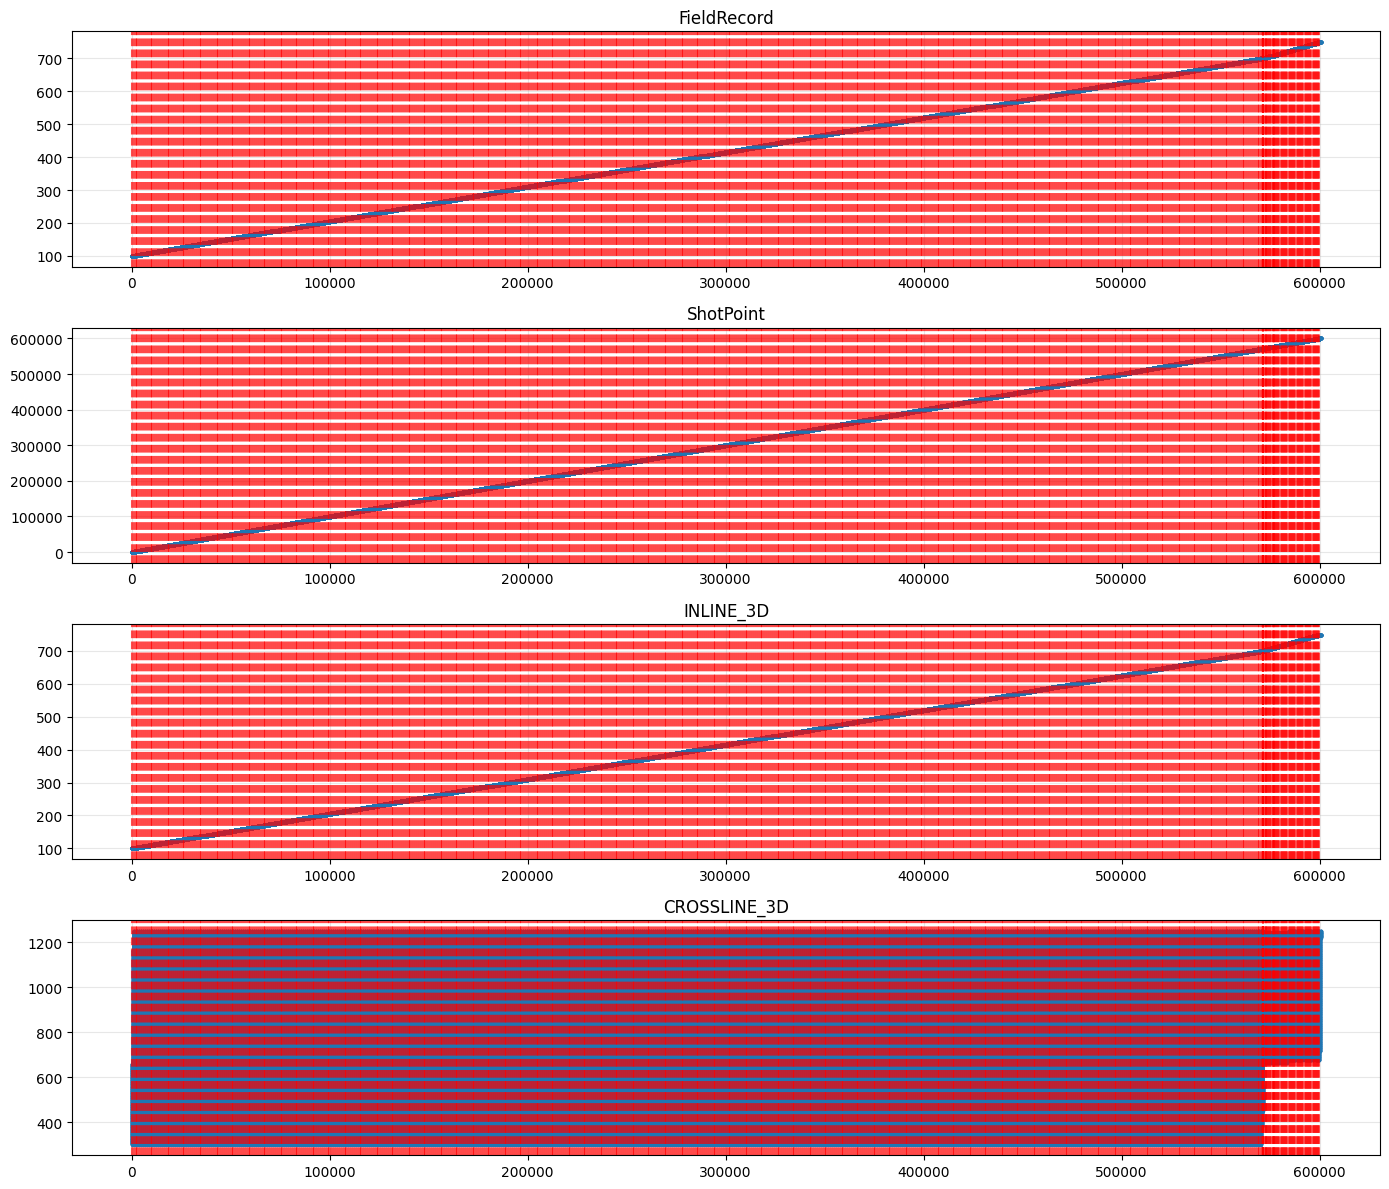

In [6]:
secciones, headers = analizar_secciones_sismicas(sgy_path) 

In [9]:
with segyio.open(sgy_path, "r", ignore_geometry=True) as f:
    # 1. Definir submuestreo (para no colapsar la memoria)
    step = 1000  # Leer 1 de cada 1000 trazas
    
    # 2. Crear section (matriz 2D)
    section = []
    
    # Leer trazas submuestreadas
    for i in range(0, f.tracecount, step):
        section.append(f.trace[i])  # Añadir traza completa
    
    # Convertir a array NumPy (optimizado)
    section = np.array(section)
    
    # 3. Verificar dimensiones
    print(f"Forma de section: {section.shape}")  # Ej: (4981, 2000)

Forma de section: (601, 462)


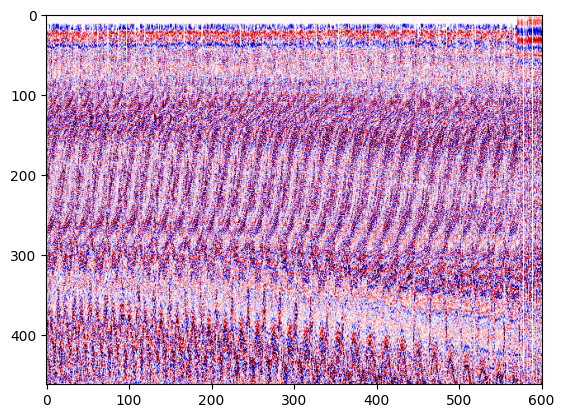

In [14]:
# Calcula percentiles para evitar outliers
p99 = np.percentile(section, 99)  # Percentil 99%
p1 = np.percentile(section, 1)    # Percentil 1%

plt.imshow(section.T,
           cmap='seismic',
           vmin=p1,
           vmax=p99,
           aspect='auto')

cantidad de secciones:  662
{'start': 95100, 'end': 96050, 'traces': 951, 'FieldRecord': (200, 200), 'ShotPoint': (95101, 96051), 'INLINE_3D': (200, 200), 'CROSSLINE_3D': (300, 1250)}

DATAFRAME CREADO:
• Dimensiones: (949, 462)


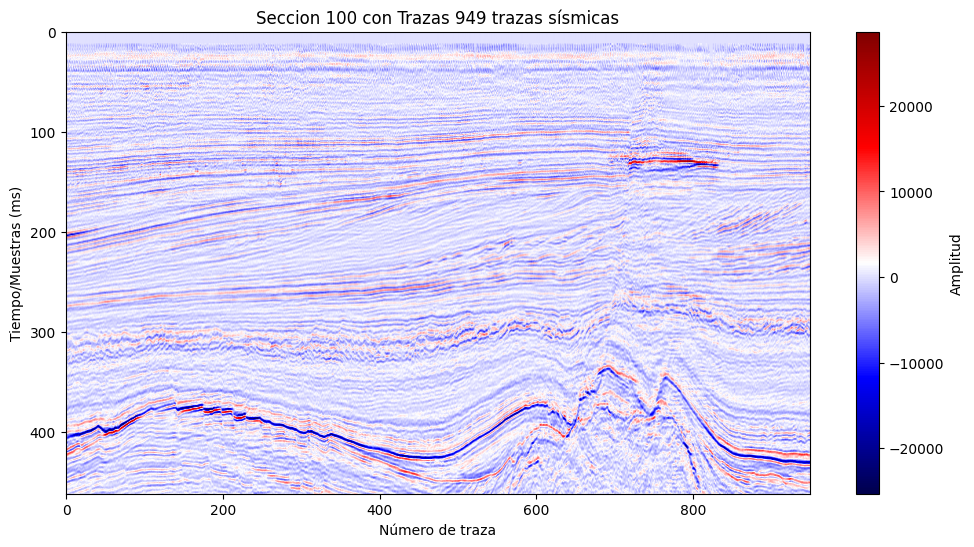

In [21]:
n_secciones = 100

print("cantidad de secciones: ",len(secciones))

max_n = secciones[n_secciones]['end']
min_n = secciones[n_secciones]['start']

print(secciones[n_secciones])

# Abrir el archivo ignorando la geometría
with segyio.open(sgy_path, "r", ignore_geometry=True) as segyfile:

    # Leer todas las trazas
    data = np.array([segyfile.trace[i] for i in range(max_n) if i > min_n and i < max_n])

    np.save("data.npy", data)

    # Crear DataFrame con las trazas
    df_trazas = pd.DataFrame(data)
   

    print("\nDATAFRAME CREADO:")
    print(f"• Dimensiones: {df_trazas.shape}")

    # Visualizar la primera traza
    plt.figure(figsize=(12, 6))
    plt.imshow(df_trazas.iloc[:, :].T, aspect='auto', cmap='seismic')
    plt.title(f'Seccion {n_secciones} con Trazas {len(df_trazas)} trazas sísmicas')
    plt.xlabel('Número de traza')
    plt.ylabel('Tiempo/Muestras (ms)')
    plt.colorbar(label='Amplitud')
    plt.show()